# Simple Linear Regression

## Objectives

* Use scikit-learn to implement simple linear regression
* Create, train, and test a linear regression model on real data


In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Load the data


In [41]:
data_file= "../data/FuelConsumptionCo2.csv"

In [42]:
df = pd.read_csv(data_file)

# verify successful load with some randomly selected records
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
429,2014,FORD,TRANSIT CONNECT,SPECIAL PURPOSE VEHICLE,2.5,4,AS6,X,11.3,8.2,9.9,29,228
79,2014,BMW,328d xDRIVE,COMPACT,2.0,4,A8,D,7.6,5.5,6.7,42,181
98,2014,BMW,528i,MID-SIZE,2.0,4,A8,Z,10.2,7.0,8.8,32,202
274,2014,CHRYSLER,300,FULL-SIZE,3.6,6,A8,X,12.4,7.7,10.3,27,237
27,2014,AUDI,A6 QUATTRO TDI CLEAN DIESEL,MID-SIZE,3.0,6,AS8,D,9.8,6.4,8.3,34,224


### Explore the data


In [43]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


From the data, we can see that:
1. most cars (about 75%) have a fuel consumption between 11 and 31 MPG. 
2. Only one car shows a value of 60 MPG, which is much higher than the rest. This could either be 
- a valid reading for a highly efficient
- hybrid vehicle,
- might be an outlier or a data entry error.

3. MODELYEAR has 0 standard deviation, and thus has no interesting information content.


#### Select features
Select a few features that might be indicative of CO2 emission to explore more.


In [44]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
# Randomly selects 9 rows from the DataFrame
cdf.sample(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
578,2.0,4,9.1,209
203,1.4,4,7.1,163
199,1.8,4,8.8,202
969,3.5,6,9.6,221
1051,2.0,4,10.7,246
1053,2.0,4,10.7,246
384,3.7,6,18.0,288
252,1.4,4,7.5,172
16,4.7,8,14.7,338


#### Visualize features
Consider the histograms for each of these features.


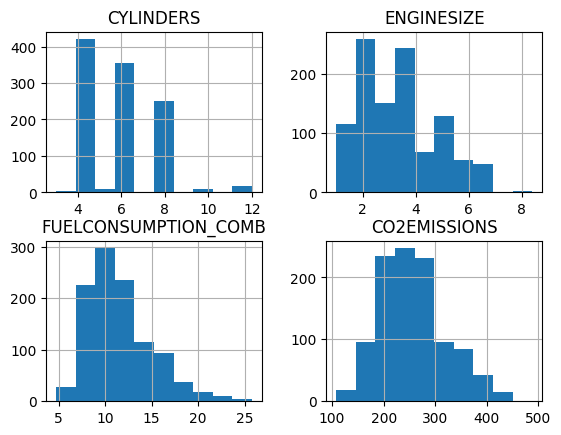

In [45]:
viz = cdf[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

- most engines have 4, 6, or 8 cylinders, and engine sizes between 2 and 4 liters.  
- As might expect, combined fuel consumption and CO2 emission have very similar distributions.  
Go ahead and display some scatter plots of these features against the CO2 emissions, to see how linear their relationships are.


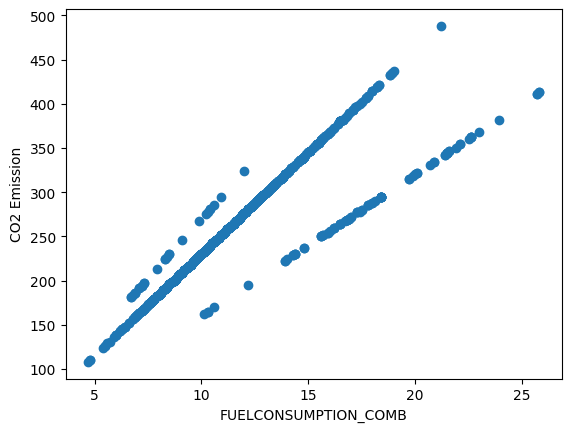

In [46]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS)
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2 Emission")
plt.show()

This is an informative result. Three car groups each have a strong linear relationship between their combined fuel consumption and their CO2 emissions. 
Their intercepts are similar, while they noticeably differ in their slopes.


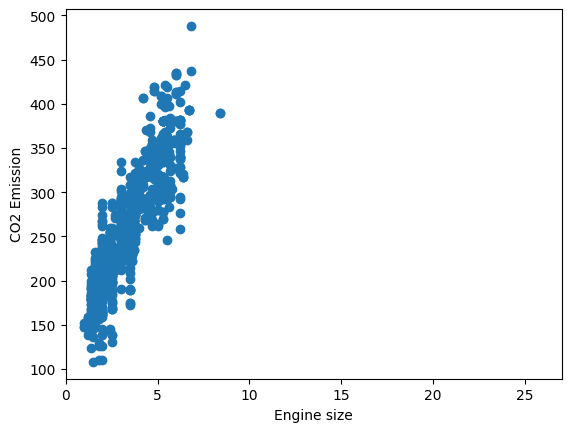

In [47]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS)
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")
plt.xlim(0,27)
plt.show()

Although the relationship between engine size and CO2 emission is quite linear, their correlation is weaker than that for each of the three fuel consumption groups. Notice that the x-axis range has been expanded to make the two plots more comparable.


Plot __CYLINDER__ against CO2 Emission, to see how linear their relationship is.


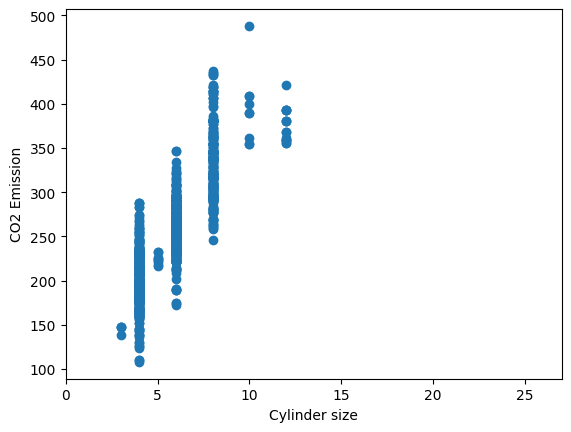

In [48]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS)
plt.xlabel("Cylinder size")
plt.ylabel("CO2 Emission")
plt.xlim(0,27)
plt.show()

### Extract the input feature and labels from the dataset
Use **ENGINESIZE** to predict **CO2EMISSIONS** with a linear regression model.  

In [49]:
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

In [50]:
pd.DataFrame(X).describe().round(2)

,0
count,1067.00
mean,3.35
std,1.42
min,1.00
25%,2.00
50%,3.40
75%,4.30
max,8.40


#### Create train and test datasets
Randomly split your data into train and test sets, using 80% of the dataset for **training** and reserving the remaining 20% for **testing**.

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

The outputs are one-dimensional NumPy arrays or vectors.


In [52]:
type(X_train), np.shape(X_train), np.shape(X_train)

(numpy.ndarray, (853,), (853,))

### Build a simple linear regression model

You'll use scikit-learn to build your model as follows. See [Scikit-Learn Linear Regression documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to learn all about the linear model predictor object.


In [53]:
from sklearn import linear_model

# create a model object
regressor = linear_model.LinearRegression()

# train the model on the training data
# X_train is a 1-D array but sklearn models expect a 2D array as input for the training data, with shape (n_observations, n_features).
# So we need to reshape it. We can let it infer the number of observations using '-1'.
regressor.fit(X_train.reshape(-1, 1), y_train)

# Print the coefficients
coef_ =  regressor.coef_  # with simple linear regression there is only one coefficient
intercept_ = regressor.intercept_

# Print the coefficients
print ('Coefficients: ',coef_)
print ('Intercept: ',intercept_)


Coefficients:  [38.99297872]
Intercept:  126.28970217408721


- __Coefficient__ and __Intercept__ are the regression parameters determined by the model.  
- They define the slope and intercept of the 'best-fit' line to the training data. 


### Visualize model outputs


You can visualize the goodness-of-fit of the model to the training data by plotting the fitted line over the data.

The regression model is the line given by y = intercept + coefficient * x.


Text(0, 0.5, 'Emission')

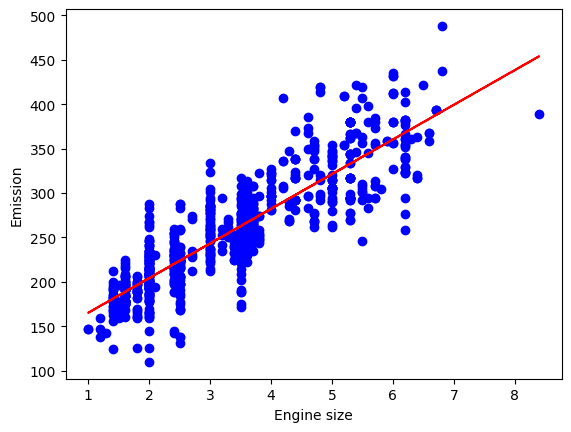

In [54]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Model evaluation
You can compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics play a key role in the development of a model, as they provide insight into areas that require improvement.

There are different model evaluation metrics, let's use MSE here to calculate the accuracy of our model based on the test set: 
* Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just an average error.

* Mean Squared Error (MSE): MSE is the mean of the squared error. In fact, it's the metric used by the model to find the best fit line, and for that reason, it is also called the residual sum of squares.

* Root Mean Squared Error (RMSE). RMSE simply transforms the MSE into the same units as the variables being compared, which can make it easier to interpret.

* R2-Score is not an error but rather a popular metric used to estimate the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R2-Score value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use the predict method to make test predictions
y_pred = regressor.predict(X_test.reshape(-1,1))

# Evaluation
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2-score: %.2f" % r2_score(y_test, y_pred))

Mean absolute error: 24.10
Mean squared error: 985.94
Root mean squared error: 31.40
R2-score: 0.76


#### 1. Plot the regression model result over the test data instead of the training data. Visually evaluate whether the result is good.


Text(0, 0.5, 'Emission')

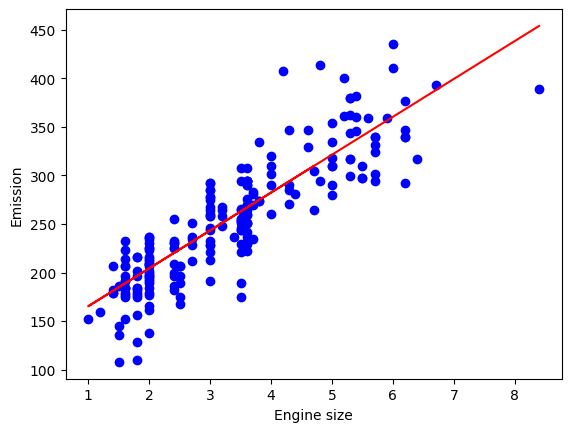

In [57]:
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, regressor.coef_ * X_test + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Let's see the evaluation metrics if you train a regression model using the `FUELCONSUMPTION_COMB` feature.

#### 2. Select the fuel consumption feature from the dataframe and split the data 80%/20% into training and testing sets. 
Use the same random state as previously so you can make an objective comparison to the previous training result.


In [58]:
X = cdf.FUELCONSUMPTION_COMB.to_numpy()

X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.2,random_state=42)


#### 3.  Train a linear regression model using the training data you created.
Remember to transform your 1D feature into a 2D array. 


In [59]:
# create a model object
regressor = linear_model.LinearRegression()

# train the model on the training data
# X_train is a 1-D array but sklearn models expect a 2D array as input for the training data, with shape (n_observations, n_features).
# So we need to reshape it. We can let it infer the number of observations using '-1'.
regressor.fit(X_train.reshape(-1, 1), y_train)

# Print the coefficients
coef_ =  regressor.coef_  # with simple linear regression there is only one coefficient
intercept_ = regressor.intercept_

# Print the coefficients
print ('Coefficients: ',coef_)
print ('Intercept: ',intercept_)


Coefficients:  [16.18090078]
Intercept:  69.10302617988444


#### 4. Use the model to make test predictions on the fuel consumption testing data.


In [60]:
y_pred = regressor.predict(X_test.reshape(-1,1))

#### 5. Calculate and print the Mean Squared Error of the test predictions.


In [65]:
# Evaluation
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2-score: %.2f" % r2_score(y_test, y_pred))


Mean absolute error: 20.44
Mean squared error: 797.43
Root mean squared error: 28.24
R2-score: 0.81


As you might expect from your exploratory analysis, the MSE is smaller when we train using `FUELCONSUMPTION_COMB` rather than `ENGINESIZE`.
